<a href="https://colab.research.google.com/github/k2h2j3/My-First-AI/blob/master/catdog3rd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten
from matplotlib.cbook import flatten

import numpy as np
import tensorflow as tf

In [2]:
train_dir = '/content/drive/MyDrive/catdog/train/train'
test_dir = 'drive/MyDrive/Colab Notebooks/dogs_vs_cats_small/test'
validation_dir = 'drive/MyDrive/Colab Notebooks/dogs_vs_cats_small/validation'

train_dogs_dir = '/content/drive/MyDrive/catdog/train/train/dogs'
train_cats_dir = '/content/drive/MyDrive/catdog/train/train/cats'

test_dogs_dir = 'drive/MyDrive/Colab Notebooks/dogs_vs_cats_small/test/dogs'
test_cats_dir = 'drive/MyDrive/Colab Notebooks/dogs_vs_cats_small/test/cats'

validation_dogs_dir = '/content/drive/MyDrive/Colab Notebooks/dogs_vs_cats_small/validation/dogs'
validation_cats_dir = '/content/drive/MyDrive/Colab Notebooks/dogs_vs_cats_small/validation/cats'

In [3]:
#listdir() 해당폴더에 있는 파일을 가져온다
print("훈련 개 데이터 수 : {}".format(len(os.listdir(train_dogs_dir))))
print("훈련 고양이 데이터 수 : {}".format(len(os.listdir(train_cats_dir))))

print("테스트 개 데이터 수 : {}".format(len(os.listdir(test_dogs_dir))))
print("테스트 고양이 데이터 수 : {}".format(len(os.listdir(test_cats_dir))))

print("검증 개 데이터 수 : {}".format(len(os.listdir(validation_dogs_dir))))
print("검증 고양이 데이터 수 : {}".format(len(os.listdir(validation_cats_dir))))

훈련 개 데이터 수 : 12500
훈련 고양이 데이터 수 : 12500
테스트 개 데이터 수 : 500
테스트 고양이 데이터 수 : 500
검증 개 데이터 수 : 1000
검증 고양이 데이터 수 : 1000


In [4]:
#스케일링
train_gen = ImageDataGenerator( rescale = 1./255)
val_gen = ImageDataGenerator( rescale = 1./255)
test_gen = ImageDataGenerator( rescale = 1./255)

In [5]:
# flow_from_directory: 폴더에서 이미지 가져오기
# 폴더명, 이미지 크기, 한번에 변환 할 이미지 수, 라벨링 모드
# 이진분류 = binary, 다중 분류 = categorical 
# 라벨 번호는 0부터 시작(cat은 0, dog는 1)
train_generator = train_gen.flow_from_directory(train_dir,
                              target_size =(64,64),
                              batch_size=32,
                              class_mode = 'binary')
val_generator = val_gen.flow_from_directory( validation_dir,
                            target_size = (64,64),
                            batch_size=32,
                            class_mode =  'binary')
test_generator = test_gen.flow_from_directory( test_dir,
                            target_size = (64,64),
                            batch_size=32,
                            class_mode =  'binary')

Found 25000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [6]:
seed = 0
np.random.seed(seed)
tf.random.set_seed(seed)

In [7]:
c_model = Sequential()

# 입력층(CNN)
# 특징을 도드라지게 해준다
c_model.add(Conv2D(filters = 32, # 사진에서 찾을 특성 개수
                   kernel_size = (3,3), # 한번에 확인할 픽셀의 수
                   input_shape = (64,64,3), # 입력 데이터의 크기
                   padding = 'same', # 가장 자리를 0으로 채움 
                  # same : 입력데이터의 크기와 동일하게 맞춰준다
                   activation = 'relu'))
#불필요한 부분 삭제
c_model.add(MaxPooling2D(pool_size = (2,2),strides=2))

c_model.add(Conv2D(filters = 32, # 사진에서 찾을 특성 개수
                   kernel_size = (3,3), # 한번에 확인할 픽셀의 수
                   input_shape = (64,64,3), # 입력 데이터의 크기
                   padding = 'same', # 가장 자리를 0으로 채움(입력이미지크기=출력이미지크기)
                  # same : 입력데이터의 크기와 동일하게 맞춰준다
                   activation = 'relu'))

c_model.add(MaxPooling2D(pool_size = (2,2),strides=2))

# 1차원으로 데이터 축소
c_model.add(Flatten())

#은닉층
c_model.add(Dense(units=128, activation = 'relu'))

#출력층
c_model.add(Dense(units=1, activation= 'sigmoid'))

c_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 128)               1

In [8]:
adam = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
c_model.compile(loss='binary_crossentropy',
                optimizer = adam,
                metrics=['accuracy'])
c_histroy = c_model.fit_generator(generator=train_generator,
            steps_per_epoch=200,
            epochs=100,
            validation_data = val_generator,
            validation_steps = 2)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  if __name__ == '__main__':


Epoch 1/100
200/200 [==============================] - 836s 4s/step - loss: 0.6653 - accuracy: 0.5939 - val_loss: 0.5517 - val_accuracy: 0.7344
Epoch 2/100
200/200 [==============================] - 463s 2s/step - loss: 0.5756 - accuracy: 0.7022 - val_loss: 0.5368 - val_accuracy: 0.7812
Epoch 3/100
200/200 [==============================] - 367s 2s/step - loss: 0.5406 - accuracy: 0.7262 - val_loss: 0.4681 - val_accuracy: 0.7500
Epoch 4/100
200/200 [==============================] - 281s 1s/step - loss: 0.5170 - accuracy: 0.7508 - val_loss: 0.4353 - val_accuracy: 0.7812
Epoch 5/100
200/200 [==============================] - 217s 1s/step - loss: 0.4912 - accuracy: 0.7609 - val_loss: 0.4963 - val_accuracy: 0.7188
Epoch 6/100
200/200 [==============================] - 187s 935ms/step - loss: 0.4708 - accuracy: 0.7756 - val_loss: 0.4068 - val_accuracy: 0.7969
Epoch 7/100
200/200 [==============================] - 140s 701ms/step - loss: 0.4357 - accuracy: 0.7977 - val_loss: 0.4113 - val_acc

[]

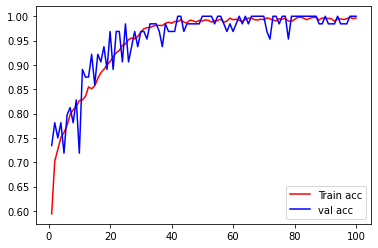

In [9]:
import matplotlib.pyplot as plt
acc = c_histroy.history['accuracy']
val_acc = c_histroy.history['val_accuracy']

epoch = range(1, len(acc)+1) #정확도의 개수

plt.plot(epoch, acc, c='red', label = 'Train acc') # 훈련 데이터 정확도
plt.plot(epoch, val_acc, c= 'blue', label = 'val acc') # 검증 데이터 정확도
plt.legend() #범례
plt.plot()